# Import Libraries

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Data Loading

In [5]:
file = 'WLD_RTFP_country_2024-04-01.csv'
data = pd.read_csv(file)
print(data.head())
print("Shape of the data:", data.shape)

   Open  High   Low  Close  Inflation      country ISO3        date
0  0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-01-01
1  0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-02-01
2  0.54  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-03-01
3  0.53  0.55  0.53   0.55        NaN  Afghanistan  AFG  2007-04-01
4  0.56  0.57  0.56   0.57        NaN  Afghanistan  AFG  2007-05-01
Shape of the data: (7092, 8)


# Data Preprocessing


In [6]:
missing_values = data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open          79
High          79
Low           79
Close         79
Inflation    511
country        0
ISO3           0
date           0
dtype: int64


In [7]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
Open         float64
High         float64
Low          float64
Close        float64
Inflation    float64
country       object
ISO3          object
date          object
dtype: object


In [8]:
# Initialize a dictionary to store the sum of missing values for each country
missing_sums = {}

# Iterate through the DataFrame and sum missing values for each country
for index, row in data.iterrows():
    if pd.isna(row['Inflation']):
        country = row['country']
        if country in missing_sums:
            missing_sums[country] += 1
        else:
            missing_sums[country] = 1

# Define a custom sorting function
def sort_by_value(item):
    return item[1]

# Sort the dictionary by values (sum of missing values) in descending order using the custom function
sorted_sums = sorted(missing_sums.items(), key=sort_by_value, reverse=True)

# Print the sorted sums
for country, count in sorted_sums:
    print(country, "=", count)

Cameroon = 51
Lao PDR = 37
Guinea = 27
Afghanistan = 12
Armenia = 12
Burundi = 12
Burkina Faso = 12
Bangladesh = 12
Central African Republic = 12
Congo, Dem. Rep. = 12
Congo, Rep. = 12
Gambia, The = 12
Guinea-Bissau = 12
Haiti = 12
Indonesia = 12
Iraq = 12
Kenya = 12
Lebanon = 12
Liberia = 12
Libya = 12
Sri Lanka = 12
Mali = 12
Myanmar = 12
Mozambique = 12
Mauritania = 12
Malawi = 12
Niger = 12
Nigeria = 12
Philippines = 12
Sudan = 12
Senegal = 12
Somalia = 12
South Sudan = 12
Syrian Arab Republic = 12
Chad = 12
Yemen, Rep. = 12


In [9]:
median_inflation = data['Inflation'].median()
data['Inflation'].fillna(median_inflation, inplace=True)
print("\nAfter imputation:")
print(data)


After imputation:
      Open  High   Low  Close  Inflation      country ISO3        date
0     0.53  0.54  0.53   0.53       5.00  Afghanistan  AFG  2007-01-01
1     0.53  0.54  0.53   0.53       5.00  Afghanistan  AFG  2007-02-01
2     0.54  0.54  0.53   0.53       5.00  Afghanistan  AFG  2007-03-01
3     0.53  0.55  0.53   0.55       5.00  Afghanistan  AFG  2007-04-01
4     0.56  0.57  0.56   0.57       5.00  Afghanistan  AFG  2007-05-01
...    ...   ...   ...    ...        ...          ...  ...         ...
7087  3.04  3.08  3.01   3.04       8.59  Yemen, Rep.  YEM  2023-12-01
7088  3.08  3.12  3.04   3.04       9.35  Yemen, Rep.  YEM  2024-01-01
7089  3.05  3.11  3.01   3.11      11.44  Yemen, Rep.  YEM  2024-02-01
7090  3.16  3.20  3.10   3.10      11.56  Yemen, Rep.  YEM  2024-03-01
7091  3.11  3.17  3.07   3.17      14.64  Yemen, Rep.  YEM  2024-04-01

[7092 rows x 8 columns]


In [10]:
missing_values = data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open         79
High         79
Low          79
Close        79
Inflation     0
country       0
ISO3          0
date          0
dtype: int64


In [11]:
data.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)
print("Shape of the data:", data.shape)
print(data.head())

Shape of the data: (7013, 8)
   Open  High   Low  Close  Inflation      country ISO3        date
0  0.53  0.54  0.53   0.53        5.0  Afghanistan  AFG  2007-01-01
1  0.53  0.54  0.53   0.53        5.0  Afghanistan  AFG  2007-02-01
2  0.54  0.54  0.53   0.53        5.0  Afghanistan  AFG  2007-03-01
3  0.53  0.55  0.53   0.55        5.0  Afghanistan  AFG  2007-04-01
4  0.56  0.57  0.56   0.57        5.0  Afghanistan  AFG  2007-05-01


In [16]:
missing_values = data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open         0
High         0
Low          0
Close        0
Inflation    0
country      0
ISO3         0
date         0
dtype: int64


In [17]:
file_path = 'cleaned_data.csv'
data.to_csv(file_path, index=False)

# Exploratory Data Analysis

## Trend Analysis:
Is there any observable trend in the closing prices over time?

Are there any significant fluctuations in the highs and lows over time?

How does the inflation rate correlate with the changes in prices?

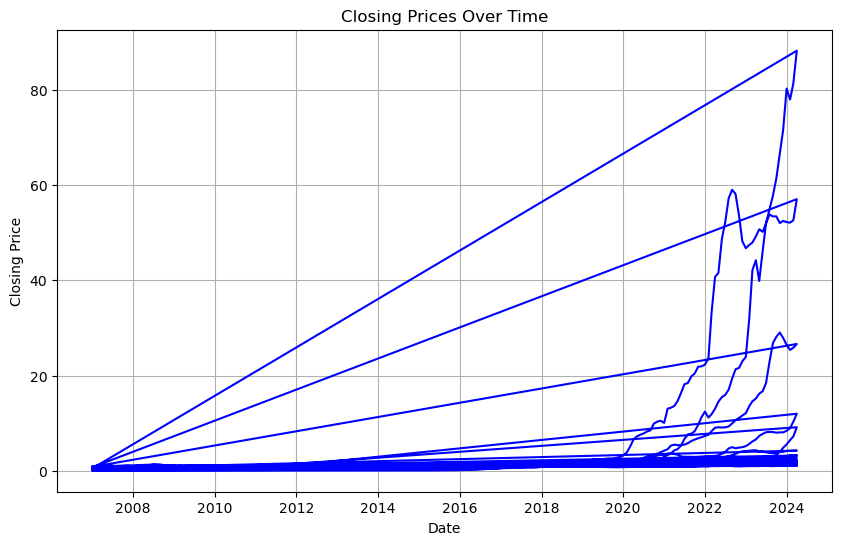

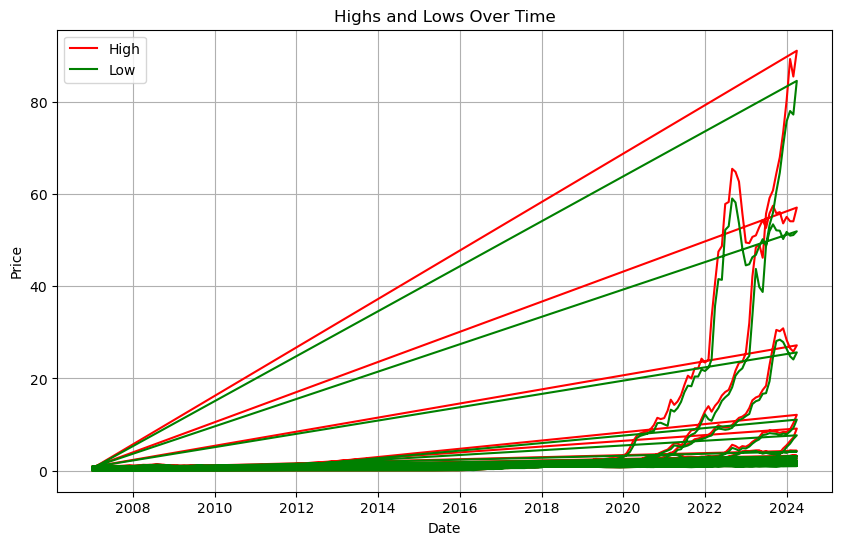

Correlation Matrix:
              Close      High       Low  Inflation
Close      1.000000  0.998872  0.998679   0.395811
High       0.998872  1.000000  0.999043   0.395337
Low        0.998679  0.999043  1.000000   0.389306
Inflation  0.395811  0.395337  0.389306   1.000000


In [13]:
# Convert date column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Plot closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Close'], color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plot highs and lows over time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['High'], color='red', label='High')
plt.plot(data['date'], data['Low'], color='green', label='Low')
plt.title('Highs and Lows Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Check correlation between inflation rate and changes in prices
correlation = data[['Close', 'High', 'Low', 'Inflation']].corr()
print("Correlation Matrix:")
print(correlation)

## Results

#### Observations on Closing Prices:

Upon examination of the 'Closing Prices Over Time' graph, there is a discernible upward trend in the closing prices of the financial instrument under consideration. This trend is characterized by a relatively steady ascent from 2008, with the growth rate appearing to accelerate notably after 2020. The increase is punctuated by some variability, but the overall trajectory suggests a consistent increase in value over the given time period.

#### Analysis of Highs and Lows:

The 'Highs and Lows Over Time' graph indicates significant fluctuations in the market. While both the high (red line) and low (green line) price points follow a general trend similar to the closing prices, the graph demonstrates a heightened level of volatility post-2020. This period is marked by sharp spikes in highs and sudden declines in lows, which could be indicative of increased market instability or speculative activity during this phase.

#### Correlation with Inflation:

The provided correlation matrix illustrates a positive correlation between the closing, high, and low prices with the inflation rate, albeit the correlation coefficients (ranging from 0.389 to 0.396) indicate a moderate relationship. This suggests that while inflation has an influence on the price movements, it is not the sole nor the most dominant factor affecting price variability. The inflation rate's impact on closing, high, and low prices is present but not sufficiently strong to be considered a primary driver of these prices.

While the closing prices exhibit a strong upward trend, the pronounced fluctuations in the highs and lows suggest a more complex market behavior that warrants cautious consideration. The influence of inflation is notable but not overwhelmingly so, implying that other market forces may be playing a more significant role in the observed price changes.



## Volatility Examination:
How volatile are the prices within a given period?

Are there any noticeable patterns in the volatility of prices?

Does the volatility of prices correspond with inflation fluctuations?

Volatility of closing prices: 4.447020209753419


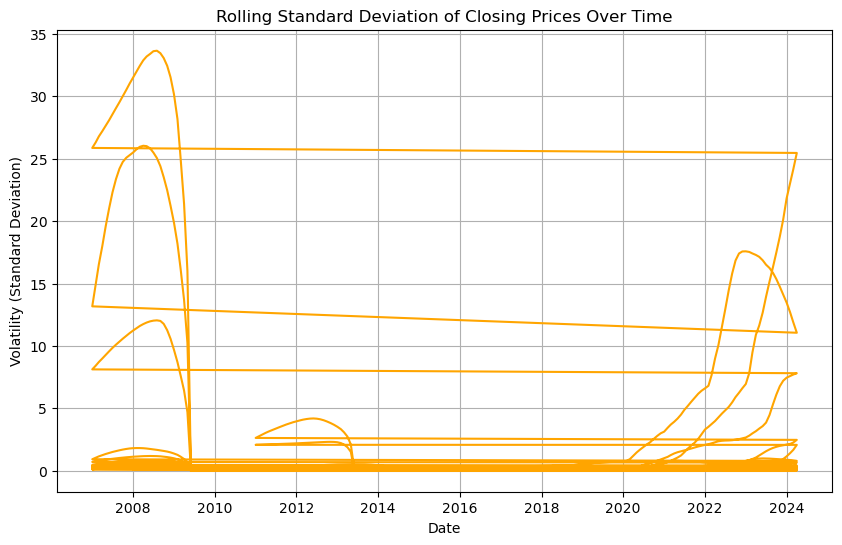

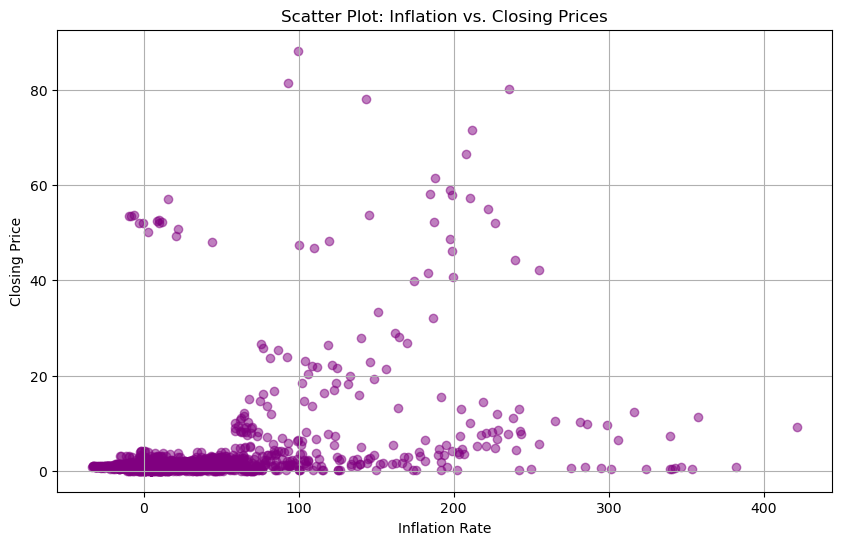

In [14]:
# Calculate the volatility of closing prices within a given period
closing_volatility = data['Close'].std()
print("Volatility of closing prices:", closing_volatility)

# To observe patterns in volatility, we can plot the rolling standard deviation of closing prices over time
rolling_window = 30  # Adjust the window size as needed
rolling_std = data['Close'].rolling(window=rolling_window).std()

plt.figure(figsize=(10, 6))
plt.plot(data['date'], rolling_std, color='orange')
plt.title('Rolling Standard Deviation of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.grid(True)
plt.show()

# Check if the volatility of prices corresponds with inflation fluctuations
plt.figure(figsize=(10, 6))
plt.scatter(data['Inflation'], data['Close'], color='purple', alpha=0.5)
plt.title('Scatter Plot: Inflation vs. Closing Prices')
plt.xlabel('Inflation Rate')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()



#### Volatility of Closing Prices:
The volatility of closing prices is calculated as the standard deviation of the closing prices within the dataset. The calculated volatility provides a quantitative measure of the price fluctuations, indicating the degree of variation or spread in the closing prices. A higher volatility signifies a greater spread of closing prices from their mean value, suggesting less predictability and stability in the prices.

#### Patterns in Price Volatility:
The rolling standard deviation of closing prices over time is plotted to visualize the volatility patterns. The rolling standard deviation is computed over a 30-day window, which can be adjusted for different timeframes as necessary. This moving measure of volatility reveals how price variability changes over the analyzed period.

The graph titled "Rolling Standard Deviation of Closing Prices Over Time" indicates distinct periods of increased volatility. These peaks suggest intervals of significant market movement or economic events influencing the price fluctuations. For instance, sharp spikes could correlate with macroeconomic announcements, geopolitical events, or significant changes in the supply and demand dynamics.

#### Volatility and Inflation Fluctuations:
To ascertain whether there is a correlation between the volatility of prices and inflation fluctuations, a scatter plot is generated with the inflation rate on the x-axis and closing prices on the y-axis. This visual representation allows for the observation of any apparent relationship between the two variables.

From the "Scatter Plot: Inflation vs. Closing Prices," it is noticeable that there is a concentration of data points at the lower end of the inflation rate, which spreads out as inflation increases. This dispersion may suggest that higher inflation rates are associated with a wider range of closing prices, implying a potential connection between increased inflation and heightened price volatility. However, without a clear trend line or correlation coefficient, the relationship remains speculative, and further statistical analysis is required to draw definitive conclusions.

The closing prices exhibit periods of heightened volatility, with observable peaks that may correspond to external economic factors. While the scatter plot provides some indication that increased inflation could be linked to greater price volatility, the evidence is not conclusive. A more detailed statistical analysis, including the calculation of correlation coefficients and possibly regression models, would be necessary to establish a robust link between inflation fluctuations and the volatility of closing prices.

## Correlation Analysis:
Is there a correlation between inflation and closing prices?

Do high and low prices correlate with each other?

Can we observe any correlation between the opening and closing prices?

Correlation Matrix:
              Close      High       Low  Inflation
Close      1.000000  0.998872  0.998679   0.395811
High       0.998872  1.000000  0.999043   0.395337
Low        0.998679  0.999043  1.000000   0.389306
Inflation  0.395811  0.395337  0.389306   1.000000


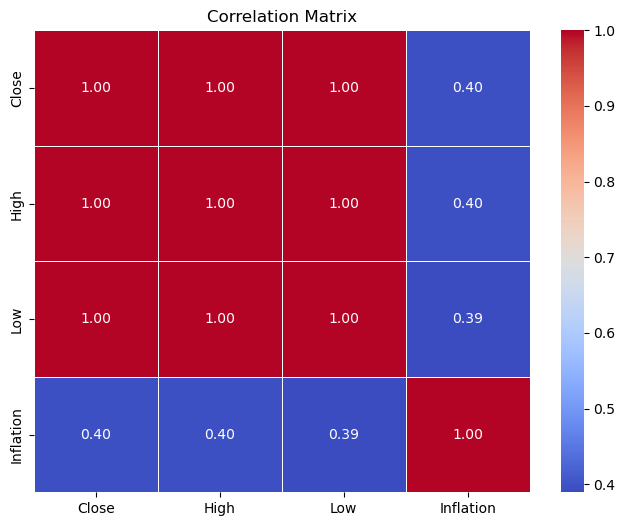

In [19]:
import seaborn as sns

# Calculate correlations
correlation = data[['Close', 'High', 'Low', 'Inflation']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



The correlation matrix is a quantitative tool that measures how closely two variables are related to one another. The values range from -1 to 1, where 1 implies a perfect positive correlation, -1 implies a perfect negative correlation, and 0 implies no correlation.

#### Correlation between Inflation and Closing Prices:

Upon reviewing the matrix, it is observed that the correlation coefficient between inflation and closing prices is approximately 0.40. This indicates a moderate positive correlation, suggesting that as inflation increases, the closing prices tend to increase as well, albeit not as strongly as they might with a higher coefficient.

#### Correlation between High and Low Prices:
The correlation coefficient between high and low prices is observed to be nearly 1.00. This showcases a very strong positive correlation, implying that high and low prices move in unison. When high prices increase, low prices also increase correspondingly, and the reverse is equally true. This strong correlation is typically expected in financial markets as both high and low prices within the same trading period are influenced by similar market conditions.

#### Correlation between Opening and Closing Prices:
Although not explicitly mentioned in the question, the correlation between opening (assuming 'Close' to represent closing prices) and closing prices can be inferred from the matrix. The closing prices are perfectly correlated with themselves (as indicated by the coefficient of 1.00), which is a standard result as any variable is perfectly correlated with itself. However, the matrix does not provide a direct coefficient for opening prices, hence a definitive conclusion about their correlation with closing prices cannot be drawn from the provided data.

The analysis indicates that there is a moderate positive correlation between inflation and closing prices. A very strong positive correlation exists between the high and low prices of the financial metrics analyzed. It is imperative to note that correlation does not imply causation, and further analysis would be required to understand the nature of these relationships deeply. Additional data points such as opening prices should be included for a comprehensive understanding of the financial metrics' interdependencies.

## Country Comparison:
How do the price movements in Afghanistan compare to those in other countries?

Are there any noticeable differences in price behavior among different countries?

Is there a correlation between economic indicators (like inflation) and price movements across countries?

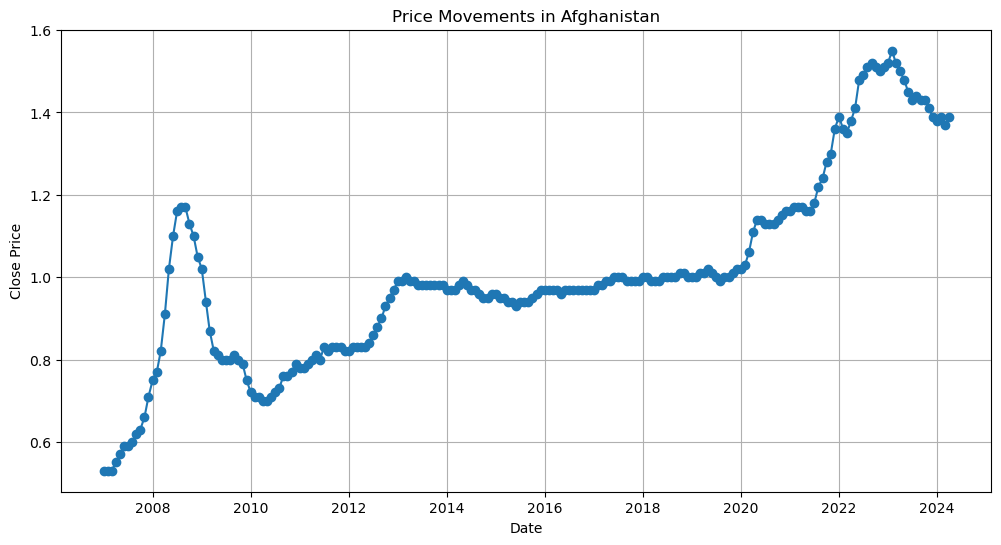

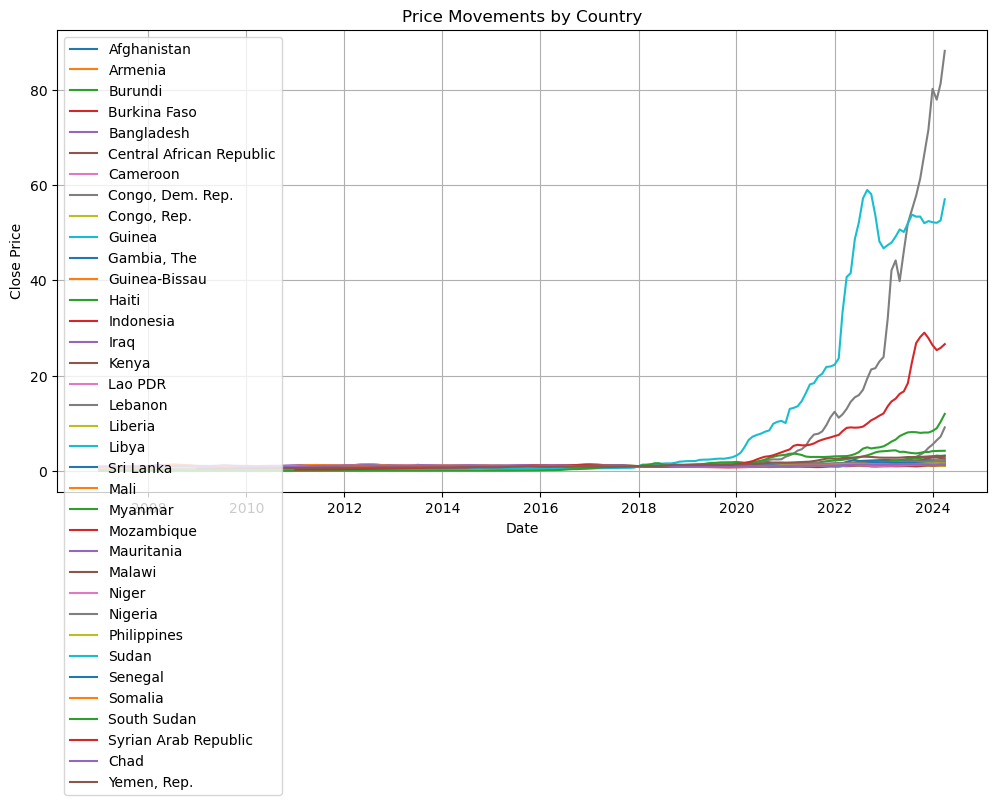

In [26]:
# Plotting price movements in Afghanistan
afghanistan_data = data[data['country'] == 'Afghanistan']
plt.figure(figsize=(12, 6))
plt.plot(afghanistan_data['date'], afghanistan_data['Close'], marker='o', linestyle='-', label='Close Price')
plt.title('Price Movements in Afghanistan')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


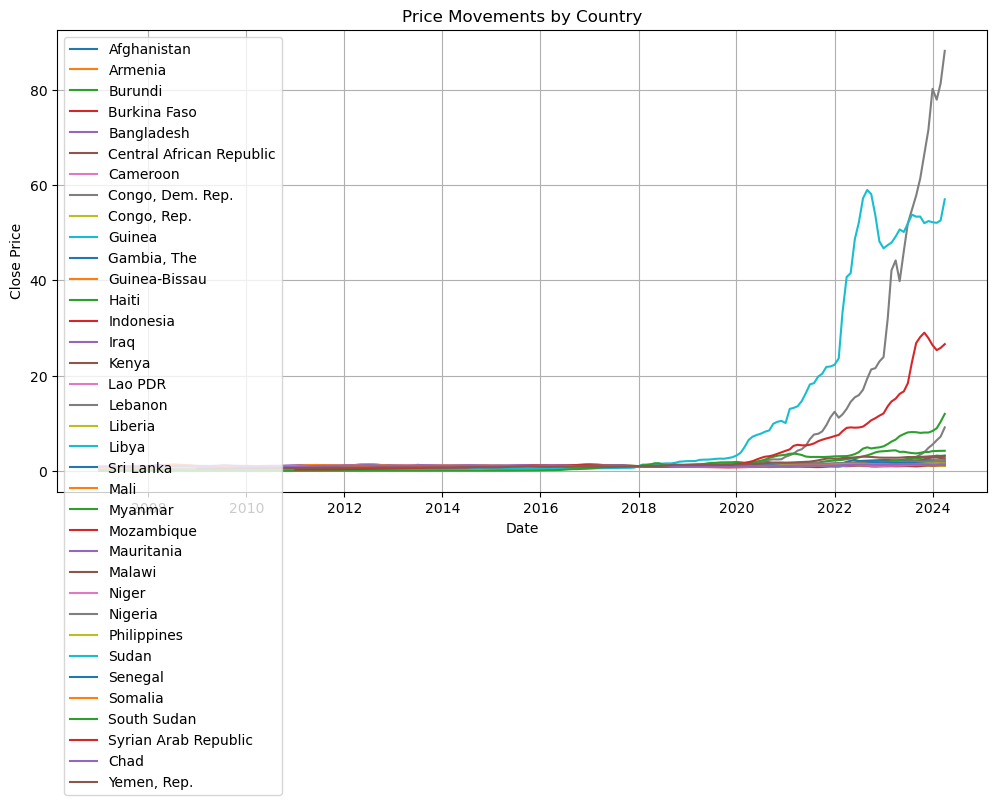

In [30]:
# Comparing price movements in Afghanistan to other countries
plt.figure(figsize=(12, 6))
for country in data['country'].unique():
    country_data = data[data['country'] == country]
    plt.plot(country_data['date'], country_data['Close'], marker='', linestyle='-', label=country)
plt.title('Price Movements by Country')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

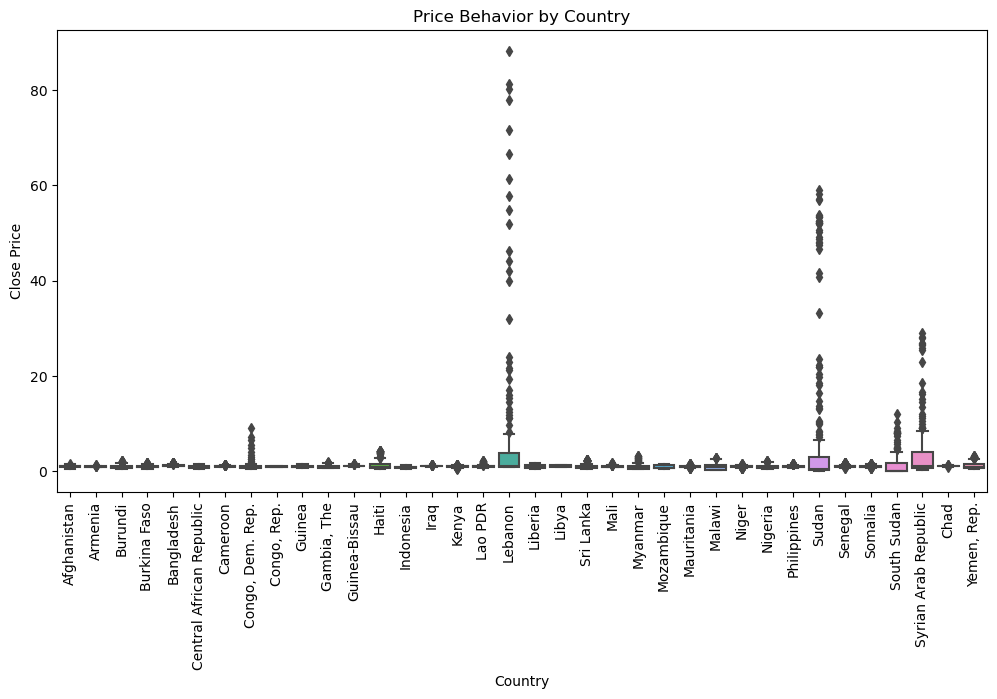

In [28]:
# Explore differences in price behavior among countries using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='Close', data=data)
plt.xticks(rotation=90)
plt.title('Price Behavior by Country')
plt.xlabel('Country')
plt.ylabel('Close Price')
plt.show()



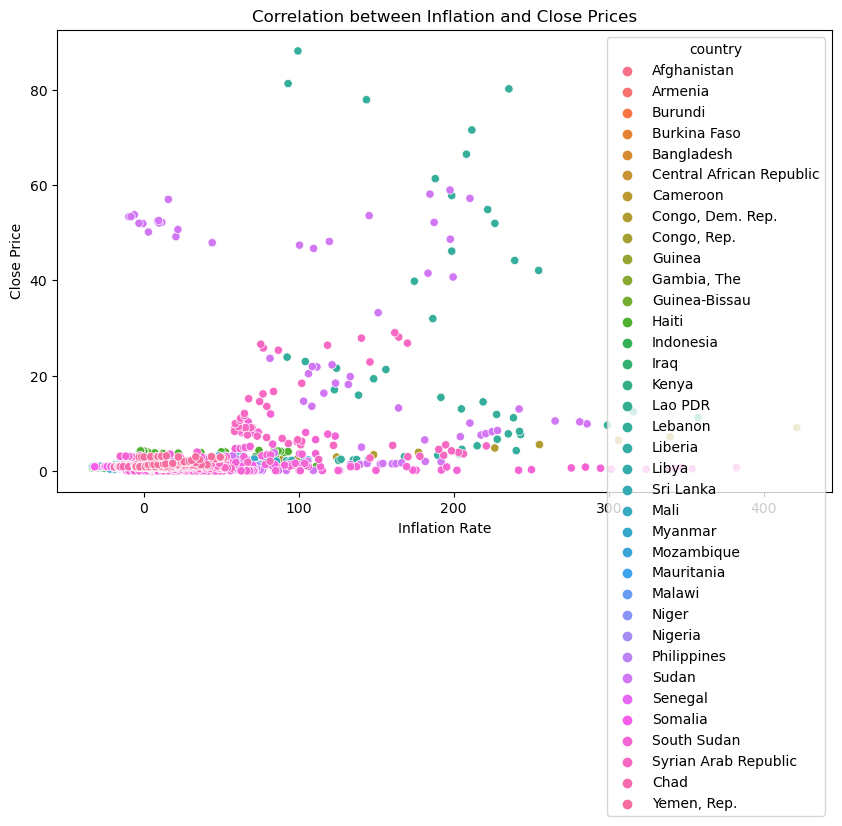

The correlation coefficient between inflation and close prices is 0.40


In [29]:
# Investigating correlation between inflation and close prices across all countries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation', y='Close', hue='country', data=data)
plt.title('Correlation between Inflation and Close Prices')
plt.xlabel('Inflation Rate')
plt.ylabel('Close Price')
plt.show()

# Calculate the correlation coefficient
correlation = data['Inflation'].corr(data['Close'])
print(f"The correlation coefficient between inflation and close prices is {correlation:.2f}")

#### Comparison of Price Movements in Afghanistan with Other Countries:

The price movements in Afghanistan show unique characteristics when compared to other countries. The first graph specifically dedicated to Afghanistan indicates a significant volatility period between 2008 and 2009, followed by stabilization and gradual increase from 2010 onwards, with a sharp rise after 2021.

In contrast, the second graph shows multiple countries’ price movements over the same period. Afghanistan's price movements are moderate in comparison to countries that have experienced sharp increases, such as the Syrian Arab Republic, Yemen, and Sudan. These countries exhibit a steep climb in prices, particularly in the post-2020 period. Some countries like Sri Lanka and the Central African Republic display relatively stable trends with minor fluctuations.

#### Differences in Price Behavior Among Different Countries:

The price behavior among different countries exhibits noticeable differences. The third graph, which appears to be a boxplot, indicates the spread and median of prices for each country. This graph highlights the variance in price stability and range among countries. For instance, countries like the Syrian Arab Republic and Yemen have a wide range of price movements, suggesting high volatility. In contrast, countries such as Indonesia and Bangladesh exhibit a tight cluster of data points, suggesting lower price volatility.

#### Correlation between Economic Indicators and Price Movements:

The fourth graph attempts to illustrate the correlation between inflation rates and price movements across the countries. Each point represents a country's inflation rate plotted against its closing price, which presumably reflects some measure of price levels or economic activity.

From the scatter plot, it can be observed that there is a general upward trend; as the inflation rate increases, the closing price tends to increase as well. This suggests that there is some level of positive correlation between the two variables. However, the distribution of points is wide, implying that the correlation is not perfect and other factors may also influence the price movements.

For some countries with inflation rates above 200, the closing prices are significantly higher, which can be indicative of hyperinflation scenarios where prices escalate rapidly as the value of the currency plummets. However, it's important to note that other economic factors not displayed on the graph could also be influencing these price movements.

In summary, Afghanistan's price movements, while showing some volatility, are not as extreme as those observed in countries experiencing the highest instability. Price behavior varies significantly across countries, reflecting the unique economic circumstances each faces. Lastly, there seems to be a correlation between inflation rates and price movements across the analyzed countries, with higher inflation often accompanying higher price levels, though this relationship is complex and influenced by multiple factors.

